In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from category_encoders.count import CountEncoder
from sklearn.model_selection import cross_val_score


In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test  = pd.read_csv('../data/test.csv')

X_test = df_test.copy()

In [3]:
train = df_train.copy()

X_train = train.drop('Reserva Cancelada', axis=1)
y_train = train['Reserva Cancelada']

In [4]:
count = CountEncoder(return_df=True) 

X_preproc = count.fit_transform(X_train)
X_preproc = X_preproc.fillna(0)

X_test = count.transform(X_test)
X_test = X_test.fillna(0)

In [10]:
xgb_model = XGBClassifier()

xgb_model.fit(X_preproc, y_train)

y_pred = xgb_model.predict(X_test)

#scores = cross_val_score(xgb_model, X_preproc, y_train, cv=18, scoring='f1_macro') # 0.9705309503493813
scores = cross_val_score(xgb_model, X_preproc, y_train, cv=5, scoring='f1_macro') # 0.9694635763081862
print("F1-score Médio:", scores.mean())

F1-score Médio: 0.9694635763081862


In [6]:
#values = [i for i in range(2, 30, 1)]
#score_list = list()
#
#for i in values:
#    scores = cross_val_score(xgb_model, X_preproc, y_train, cv=i, scoring='f1_macro')
#    score_list.append(scores.mean())

<AxesSubplot:>

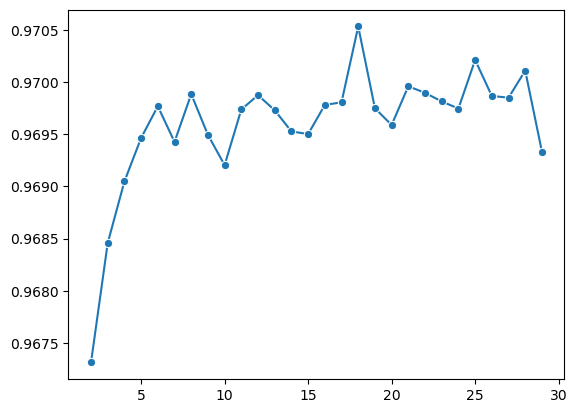

In [7]:
sns.lineplot(x=values, y=score_list, marker='o')

In [8]:
df_final_lr = pd.concat([X_test.id, pd.Series(y_pred, name = 'Reserva Cancelada')], axis=1)
df_final_lr.to_csv('../data/result/mcb_submission_xgb.csv', index=False) #Arquivo de submissão pronto para ser enviado.